<a href="https://colab.research.google.com/github/OzyMeister/ML-Minor/blob/main/ML_Exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #for visual representation

In [ ]:
data = pd.read_csv("/content/netflix.csv")

In [ ]:
#1 understanding the data 


In [ ]:
data.head() #top 5 entries 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
data.shape #(r,c)

(8807, 12)

In [ ]:
data.describe() #only int attr are shown

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.columns #list of atrr

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.nunique() #number of unique values in each column

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
data['type'].unique() #unique values in specific atrr

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#cleaning the data

In [ ]:
  data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
data1 = data.dropna() #dropping all rows with any null value

In [ ]:
data1.shape #checking for new shape of the dataset 

(5332, 12)

In [ ]:
data1.isnull().sum() #checking if there are any null values again

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
data1.nunique() #number of unique values in each column after removing null

show_id         5332
type               2
title           5332
director        3945
cast            5200
country          604
date_added      1453
release_year      72
rating            14
duration         198
listed_in        335
description     5321
dtype: int64

In [ ]:
data2 = data1.drop(['show_id','cast','date_added','listed_in','description'], axis=1) 
#removing atrr which I dont need for any valuation axis1 = columns

In [ ]:
data2.head()

,type,title,director,country,release_year,rating,duration
7,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min
8,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,9 Seasons
9,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,104 min
12,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min
24,Movie,Jeans,S. Shankar,India,1998,TV-14,166 min


In [ ]:
data2.shape

(5332, 7)

In [ ]:
data2.reset_index() #reset index as we dropped some null rows but it still had old indexing 

,index,type,title,director,country,release_year,rating,duration
0,7,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min
1,8,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,9 Seasons
2,9,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,104 min
3,12,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min
4,24,Movie,Jeans,S. Shankar,India,1998,TV-14,166 min
...,...,...,...,...,...,...,...,...
5327,8801,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,96 min
5328,8802,Movie,Zodiac,David Fincher,United States,2007,R,158 min
5329,8804,Movie,Zombieland,Ruben Fleischer,United States,2009,R,88 min
5330,8805,Movie,Zoom,Peter Hewitt,United States,2006,PG,88 min


In [ ]:
#relationship analysis

In [ ]:
corelation = data2.corr()

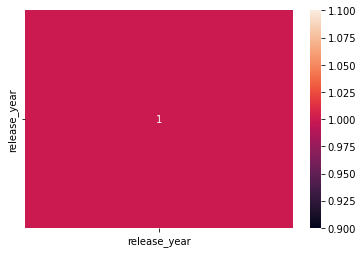

In [ ]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True) #heatmap for corr between data

In [ ]:
def filter_rows_by_values(df, col, values):  #dropping all TV shows as they have duration in seasons and we just need Mins to find corr between year and duration
    return df[~df[col].isin(values)]

data3 = filter_rows_by_values(data2, "type", ["TV Show"])

In [ ]:
data3['type'].unique() #cheching if only Movies are left in the dataset

array(['Movie'], dtype=object)

In [ ]:
data3.head() #cheching if only Movies are left in the dataset

,type,title,director,country,release_year,rating,duration
7,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min
9,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,104 min
12,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min
24,Movie,Jeans,S. Shankar,India,1998,TV-14,166 min
27,Movie,Grown Ups,Dennis Dugan,United States,2010,PG-13,103 min


In [ ]:
data3['duration'] = data3['duration'].str.extract('(\d+)', expand=False)
#removing the ' min' part of the duration and keeping only the digits 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data3.head() #checking if the duration attr only has numbers 

,type,title,director,country,release_year,rating,duration
7,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125
9,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,104
12,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127
24,Movie,Jeans,S. Shankar,India,1998,TV-14,166
27,Movie,Grown Ups,Dennis Dugan,United States,2010,PG-13,103


In [ ]:
data3['duration'] = data3['duration'].astype(int) #changing the datatype of duration from object to int

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data3.dtypes #checking if the datatype is changed 

type            object
title           object
director        object
country         object
release_year     int64
rating          object
duration         int64
dtype: object

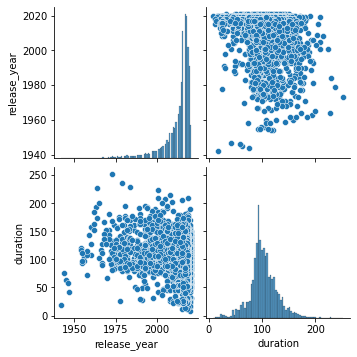

In [ ]:
sns.pairplot(data3) #pairplot to visualise rel between 2 variables for each var in our dataset

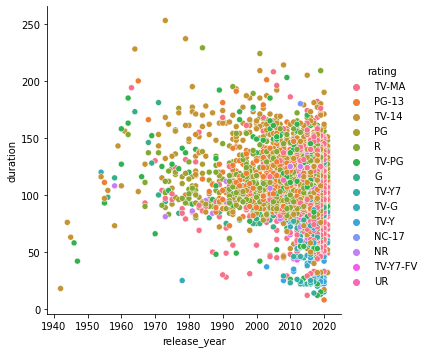

In [ ]:
sns.relplot(x='release_year',y = 'duration', hue = 'rating', data=data3) # shows rel between dur. and year. for diff ratings

In [ ]:
Var_Corr = data3.corr()

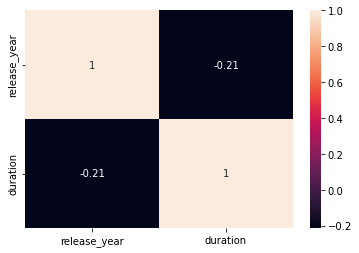

In [ ]:
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True) #corr between year and dur (weak neg corr)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


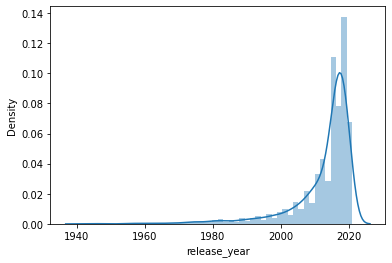

In [ ]:
sns.distplot(data3['release_year']) #histogram for frequency distributions of the duration of the movies  